In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from cmapPy.pandasGEXpress.parse import parse
from scipy.stats import hypergeom
from tqdm import tqdm

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_adrs_sexbias = pd.read_csv("df_drug_adr_p_value_sex-bias_logodd_21_11_23.csv", sep=",")

In [3]:
df_adrs_sexbias

Unnamed: 0     Drug       ADR  Number adrs in Male  \
0              0  DB00398  10061428                  150   
1              0  DB00398  10055798                   14   
2              0  DB00398  10001760                   35   
3              0  DB00398  10018388                    4   
4              0  DB00398  10043942                    2   
...          ...      ...       ...                  ...   
3958           0  DB12332  10010305                    2   
3959           0  DB12332  10061818                    2   
3960           0  DB12332  10066274                    2   
3961           0  DB12332  10043071                    2   
3962           0  DB12332  10076476                   16   

      Number adrs in Female       P-value  \
0                        52  2.832808e-02   
1                        15  4.579148e-02   
2                        47  8.193338e-06   
3                         9  1.362716e-02   
4                         5  4.333231e-02   
...                     ...           ...   
3958                     15  2.164259e-02   
3959                      4  2.632173e-03   
3960                      3  1.770550e-03   
3961                      2  1.071887e-03   
3962                     55  1.237521e-15   

                                            p_value_FDR Significance  \
0     (array([ True]), array([0.02832808]), 0.050000...          Yes   
1     (array([ True]), array([0.04579148]), 0.050000...          Yes   
2     (array([ True]), array([8.19333766e-06]), 0.05...          Yes   
3     (array([ True]), array([0.01362716]), 0.050000...          Yes   
4     (array([ True]), array([0.04333231]), 0.050000...          Yes   
...                                                 ...          ...   
3958  (array([ True]), array([0.02164259]), 0.050000...          Yes   
3959  (array([ True]), array([0.00263217]), 0.050000...          Yes   
3960  (array([ True]), array([0.00177055]), 0.050000...          Yes   
3961  (array([ True]), array([0.00107189]), 0.050000...          Yes   
3962  (array([ True]), array([1.23752125e-15]), 0.05...          Yes   

             Sex-biased  odds_ratio  Log2_Odds_ratio sex_biased_log_oddratio  \
0       sex-biased male    0.699466        -0.515673         sex-biased male   
1     sex-biased female    2.180080         1.124381       sex-biased female   
2     sex-biased female    2.748978         1.458896       sex-biased female   
3     sex-biased female    4.576790         2.194336       sex-biased female   
4     sex-biased female    5.081070         2.345132       sex-biased female   
...                 ...         ...              ...                     ...   
3958  sex-biased female    0.101973        -3.293734         sex-biased male   
3959  sex-biased female    0.027176        -5.201535         sex-biased male   
3960  sex-biased female    0.020381        -5.616655         sex-biased male   
3961      no sex-biased    0.013586        -6.201700         sex-biased male   
3962  sex-biased female    0.044078        -4.503794         sex-biased male   

      Sum_ADRS  
0          202  
1           29  
2           82  
3           13  
4            7  
...        ...  
3958        17  
3959         6  
3960         5  
3961         4  
3962        71  

[3963 rows x 13 columns]

In [4]:
df_adrs_sexbias_without_top = df_adrs_sexbias[(df_adrs_sexbias["ADR"]!= 10028813) & (df_adrs_sexbias["ADR"]!= 10011906)
               & (df_adrs_sexbias["ADR"]!= 10053762) & (df_adrs_sexbias["ADR"]!= 10012735)
               & (df_adrs_sexbias["ADR"]!= 10016256) & (df_adrs_sexbias["ADR"]!= 10047700)]

##without nausea, death, fatigue,off label use,vomiting, diarrhoea 

In [5]:
drug_mapping = pd.read_csv("drug_mapping.csv", sep=";")

In [6]:
adrs_info = pd.read_csv("adrs_information.txt", sep="\t", dtype=str)

In [7]:
adrs_info['PT'] = pd.to_numeric(adrs_info['PT'], errors='coerce').astype('int64')

In [8]:
df_drug_name = df_adrs_sexbias.merge(drug_mapping, left_on="Drug", right_on="DrugBank ID", how = "left")

In [9]:
df_drug_adr_name = df_drug_name.merge(adrs_info, left_on="ADR", right_on='PT', how = "left")

In [10]:
df_drug_adr_name.columns

Index(['Unnamed: 0', 'Drug', 'ADR', 'Number adrs in Male',
       'Number adrs in Female', 'P-value', 'p_value_FDR', 'Significance',
       'Sex-biased', 'odds_ratio', 'Log2_Odds_ratio',
       'sex_biased_log_oddratio', 'Sum_ADRS', 'Drug_name ', 'DrugBank ID',
       'PT', 'PT_name', 'HLT', 'HLT_name', 'HLGT', 'HLGT_name', 'SOC',
       'SOC_name', 'SOC_abbr'],
      dtype='object')

In [11]:
df_drug_adr_name_filter = df_drug_adr_name[["Drug","Drug_name ","ADR","PT_name","SOC_name","Number adrs in Male",'Number adrs in Female', 'P-value', 'p_value_FDR', 'Significance',
       'Sex-biased', 'odds_ratio', 'Log2_Odds_ratio',
       'sex_biased_log_oddratio', 'Sum_ADRS']]

In [12]:
df_drug_adr_name_filter

Drug Drug_name        ADR                               PT_name  \
0     DB00398  sorafenib  10061428                    decreased appetite   
1     DB00398  sorafenib  10055798                           haemorrhage   
2     DB00398  sorafenib  10001760                              alopecia   
3     DB00398  sorafenib  10018388                           glossodynia   
4     DB00398  sorafenib  10043942                     tongue blistering   
...       ...        ...       ...                                   ...   
3958  DB12332  rucaparib  10010305                     confusional state   
3959  DB12332  rucaparib  10061818                   disease progression   
3960  DB12332  rucaparib  10066274                             cytopenia   
3961  DB12332  rucaparib  10043071                           tachycardia   
3962  DB12332  rucaparib  10076476  product use in unapproved indication   

                                               SOC_name  Number adrs in Male  \
0     general disorders and administration site cond...                  150   
1                                    vascular disorders                   14   
2                skin and subcutaneous tissue disorders                   35   
3                            gastrointestinal disorders                    4   
4                            gastrointestinal disorders                    2   
...                                                 ...                  ...   
3958                           nervous system disorders                    2   
3959  general disorders and administration site cond...                    2   
3960               blood and lymphatic system disorders                    2   
3961                                  cardiac disorders                    2   
3962     injury, poisoning and procedural complications                   16   

      Number adrs in Female       P-value  \
0                        52  2.832808e-02   
1                        15  4.579148e-02   
2                        47  8.193338e-06   
3                         9  1.362716e-02   
4                         5  4.333231e-02   
...                     ...           ...   
3958                     15  2.164259e-02   
3959                      4  2.632173e-03   
3960                      3  1.770550e-03   
3961                      2  1.071887e-03   
3962                     55  1.237521e-15   

                                            p_value_FDR Significance  \
0     (array([ True]), array([0.02832808]), 0.050000...          Yes   
1     (array([ True]), array([0.04579148]), 0.050000...          Yes   
2     (array([ True]), array([8.19333766e-06]), 0.05...          Yes   
3     (array([ True]), array([0.01362716]), 0.050000...          Yes   
4     (array([ True]), array([0.04333231]), 0.050000...          Yes   
...                                                 ...          ...   
3958  (array([ True]), array([0.02164259]), 0.050000...          Yes   
3959  (array([ True]), array([0.00263217]), 0.050000...          Yes   
3960  (array([ True]), array([0.00177055]), 0.050000...          Yes   
3961  (array([ True]), array([0.00107189]), 0.050000...          Yes   
3962  (array([ True]), array([1.23752125e-15]), 0.05...          Yes   

             Sex-biased  odds_ratio  Log2_Odds_ratio sex_biased_log_oddratio  \
0       sex-biased male    0.699466        -0.515673         sex-biased male   
1     sex-biased female    2.180080         1.124381       sex-biased female   
2     sex-biased female    2.748978         1.458896       sex-biased female   
3     sex-biased female    4.576790         2.194336       sex-biased female   
4     sex-biased female    5.081070         2.345132       sex-biased female   
...                 ...         ...              ...                     ...   
3958  sex-biased female    0.101973        -3.293734         sex-biased male   
3959  sex-biased female    0.027176        -5.201535         sex-biased male   
3960  sex

In [13]:
len(df_drug_adr_name_filter["Drug_name "].unique())
## de los 95 farmacos seleccionados, tenemos ADRs para 74 

74

In [14]:
len(df_drug_adr_name_filter["PT_name"].unique())

1342

In [15]:
drug_adrs = df_drug_adr_name_filter[["Drug_name ","PT_name"]]

In [16]:
drug_adrs_group = drug_adrs.groupby("Drug_name ").count().reset_index()

In [17]:
drug_adrs_group

Drug_name   PT_name
0   abiraterone       22
1      afatinib        2
2    anagrelide        2
3   anastrozole       25
4      axitinib       17
..          ...      ...
69  vemurafenib        2
70  vinblastine        9
71  vincristine      104
72  vinorelbine        8
73   vorinostat        3

[74 rows x 2 columns]

In [32]:
drug_adrs_group = drug_adrs_group.sort_values(by='PT_name', ascending=False)

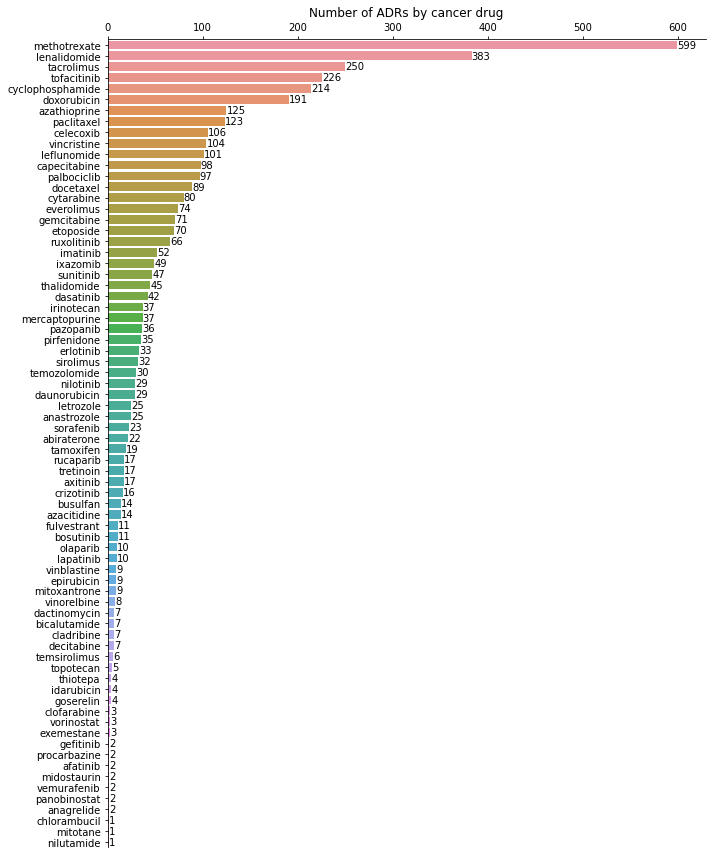

In [33]:
fig, ax = plt.subplots(figsize=(10, 12))

#sns.set_palette( my_colors )
sns.barplot(data=drug_adrs_group, x="PT_name", y="Drug_name ", orient='h').set_title('Number of ADRs by cancer drug')
#plt.xticks(rotation=90)
sns.despine(top=False, bottom=True)
ax.bar_label(ax.containers[0])
plt.xlabel("")
plt.ylabel("")
#ax.legend(loc=(0.6,0), title='', fontsize=12)
plt.tight_layout()
plt.savefig("adrs_by_drugs.svg")
plt.show()

In [34]:
drug_adrs_group.describe()

PT_name
count   74.000000
mean    53.554054
std     93.011288
min      1.000000
25%      7.000000
50%     20.500000
75%     62.500000
max    599.000000

In [ ]:
#### volcano plots

<ipython-input-41-dd12ffe0921a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drug_adr_name_filter['log_p_values'] = -np.log10(df_drug_adr_name_filter['P-value'])
<ipython-input-41-dd12ffe0921a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drug_adr_name_filter['log_odd_ratios'] = np.log2(df_drug_adr_name_filter['odds_ratio'])


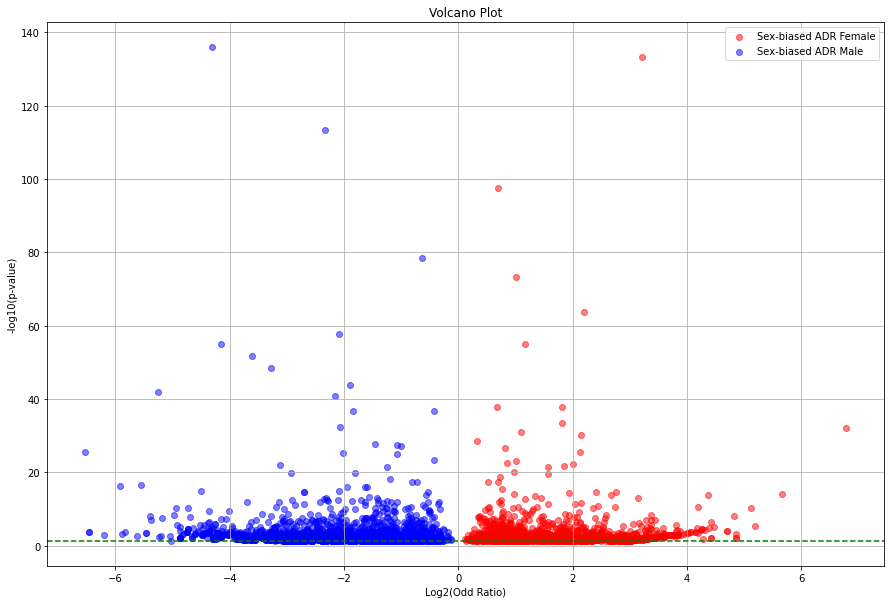

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Cálculo del logaritmo negativo base 10 de los p-values
df_drug_adr_name_filter['log_p_values'] = -np.log10(df_drug_adr_name_filter['P-value'])

# Cálculo del logaritmo base 2 del odd ratio
df_drug_adr_name_filter['log_odd_ratios'] = np.log2(df_drug_adr_name_filter['odds_ratio'])

# Separar los puntos en dos grupos según el signo del odd ratio
odd_ratio_pos = df_drug_adr_name_filter['log_odd_ratios'][df_drug_adr_name_filter['log_odd_ratios'] > 0]
odd_ratio_neg = df_drug_adr_name_filter['log_odd_ratios'][df_drug_adr_name_filter['log_odd_ratios'] <= 0]

# Plot
plt.figure(figsize=(15, 10))
plt.scatter(odd_ratio_pos,df_drug_adr_name_filter['log_p_values'][df_drug_adr_name_filter['log_odd_ratios'] > 0], color='red', alpha=0.5, label='Sex-biased ADR Female')
plt.scatter(odd_ratio_neg, df_drug_adr_name_filter['log_p_values'][df_drug_adr_name_filter['log_odd_ratios'] <= 0], color='blue', alpha=0.5, label='Sex-biased ADR Male')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')  # Línea para indicar el nivel de significancia
plt.xlabel('Log2(Odd Ratio)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.savefig("volcano_plot_adrs.svg")
plt.show()



In [44]:
df_drug_adr_name_filter["log_p_values"].describe()

count    3963.000000
mean        3.230774
std         5.573887
min         1.301405
25%         1.605907
50%         2.081328
75%         3.091855
max       135.988808
Name: log_p_values, dtype: float64

In [45]:
-np.log10(0.05)

1.3010299956639813

In [47]:
df_drug_adr_name_filter["P-value"].describe()

count     3.963000e+03
mean      1.424071e-02
std       1.509667e-02
min      1.026107e-136
25%       8.093685e-04
50%       8.292245e-03
75%       2.477953e-02
max       4.995681e-02
Name: P-value, dtype: float64

In [ ]:
### hacer uno para un farmaco concreto SIROLIMUS

In [56]:
df_sirolimus = df_drug_adr_name_filter[df_drug_adr_name_filter["Drug_name "]=="sirolimus"]

<ipython-input-67-f2cf59eb667e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirolimus['log_p_values'] = -np.log10(df_sirolimus['P-value'])
<ipython-input-67-f2cf59eb667e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirolimus['log_odd_ratios'] = np.log2(df_sirolimus['odds_ratio'])


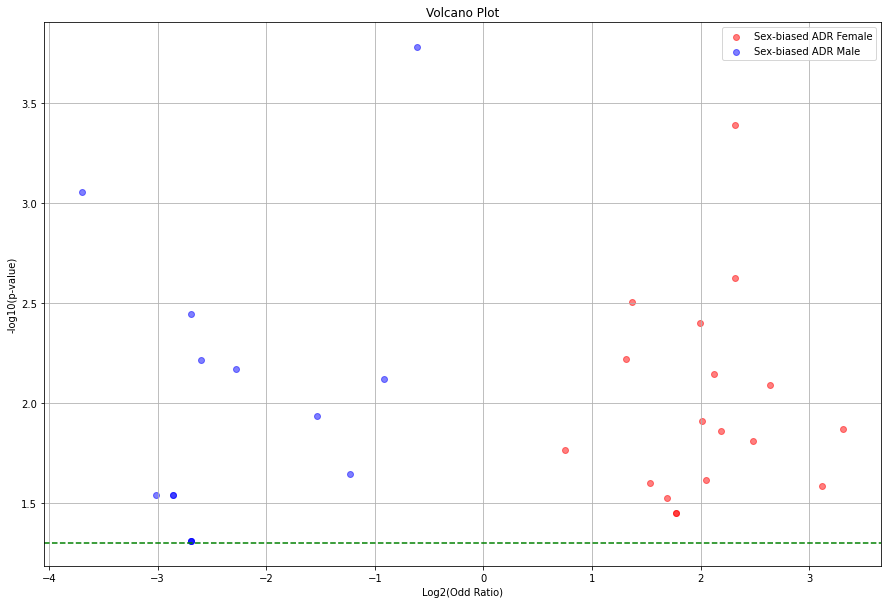

In [67]:


# Cálculo del logaritmo negativo base 10 de los p-values
df_sirolimus['log_p_values'] = -np.log10(df_sirolimus['P-value'])

# Cálculo del logaritmo base 2 del odd ratio
df_sirolimus['log_odd_ratios'] = np.log2(df_sirolimus['odds_ratio'])

# Separar los puntos en dos grupos según el signo del odd ratio
odd_ratio_pos = df_sirolimus['log_odd_ratios'][df_sirolimus['log_odd_ratios'] > 0]
odd_ratio_neg = df_sirolimus['log_odd_ratios'][df_sirolimus['log_odd_ratios'] <= 0]

# Plot
plt.figure(figsize=(15, 10))
plt.scatter(odd_ratio_pos,df_sirolimus['log_p_values'][df_sirolimus['log_odd_ratios'] > 0], color='red', alpha=0.5, label='Sex-biased ADR Female')
plt.scatter(odd_ratio_neg, df_sirolimus['log_p_values'][df_sirolimus['log_odd_ratios'] <= 0], color='blue', alpha=0.5, label='Sex-biased ADR Male')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')  # Línea para indicar el nivel de significancia




plt.xlabel('Log2(Odd Ratio)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.savefig("volcano_plot_adrs_sirolimus.svg")
plt.show()


<ipython-input-66-3a1bac24cb39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirolimus['log_p_values'] = -np.log10(df_sirolimus['P-value'])
<ipython-input-66-3a1bac24cb39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sirolimus['log_odd_ratios'] = np.log2(df_sirolimus['odds_ratio'])


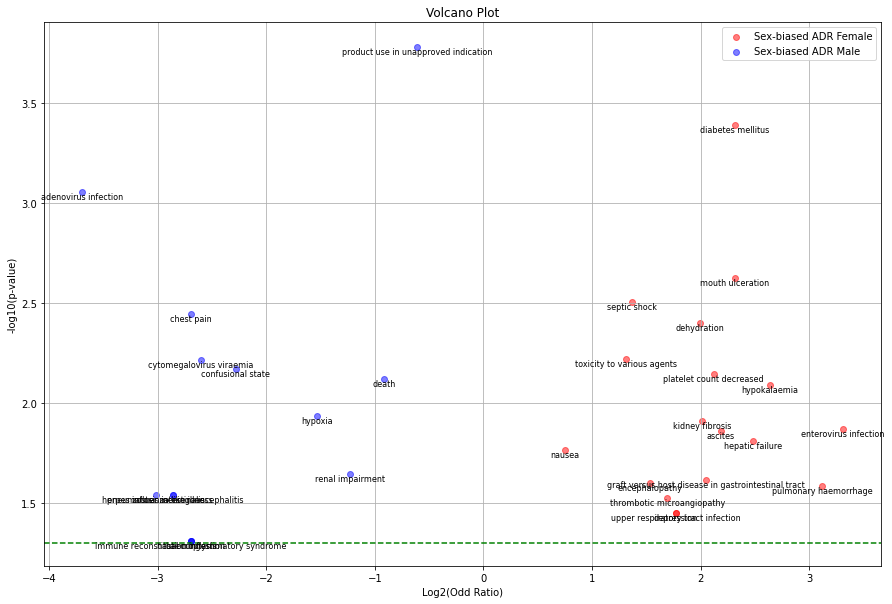

In [66]:


# Cálculo del logaritmo negativo base 10 de los p-values
df_sirolimus['log_p_values'] = -np.log10(df_sirolimus['P-value'])

# Cálculo del logaritmo base 2 del odd ratio
df_sirolimus['log_odd_ratios'] = np.log2(df_sirolimus['odds_ratio'])

# Separar los puntos en dos grupos según el signo del odd ratio
odd_ratio_pos = df_sirolimus['log_odd_ratios'][df_sirolimus['log_odd_ratios'] > 0]
odd_ratio_neg = df_sirolimus['log_odd_ratios'][df_sirolimus['log_odd_ratios'] <= 0]

# Plot
plt.figure(figsize=(15, 10))
plt.scatter(odd_ratio_pos,df_sirolimus['log_p_values'][df_sirolimus['log_odd_ratios'] > 0], color='red', alpha=0.5, label='Sex-biased ADR Female')
plt.scatter(odd_ratio_neg, df_sirolimus['log_p_values'][df_sirolimus['log_odd_ratios'] <= 0], color='blue', alpha=0.5, label='Sex-biased ADR Male')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')  # Línea para indicar el nivel de significancia


for x, y, nombre in zip(df_sirolimus['log_odd_ratios'], df_sirolimus['log_p_values'], df_sirolimus['PT_name']):
    plt.text(x, y, nombre, fontsize=8, ha='center', va='top')


plt.xlabel('Log2(Odd Ratio)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.savefig("volcano_plot_adrs_sirolimus_names.svg")
plt.show()



In [68]:
len(df_sirolimus)

32

In [69]:
df_sirolimus

Drug Drug_name        ADR  \
2850  DB00877  sirolimus  10012378   
2851  DB00877  sirolimus  10035528   
2852  DB00877  sirolimus  10028813   
2853  DB00877  sirolimus  10040070   
2854  DB00877  sirolimus  10070863   
2855  DB00877  sirolimus  10075160   
2856  DB00877  sirolimus  10008479   
2857  DB00877  sirolimus  10062237   
2858  DB00877  sirolimus  10012174   
2859  DB00877  sirolimus  10018964   
2860  DB00877  sirolimus  10057030   
2861  DB00877  sirolimus  10010305   
2862  DB00877  sirolimus  10011906   
2863  DB00877  sirolimus  10021143   
2864  DB00877  sirolimus  10003445   
2865  DB00877  sirolimus  10014625   
2866  DB00877  sirolimus  10012601   
2867  DB00877  sirolimus  10023421   
2868  DB00877  sirolimus  10058854   
2869  DB00877  sirolimus  10028034   
2870  DB00877  sirolimus  10022004   
2871  DB00877  sirolimus  10028735   
2872  DB00877  sirolimus  10046306   
2873  DB00877  sirolimus  10043645   
2874  DB00877  sirolimus  10021015   
2875  DB00877  sirolimus  10060931   
2876  DB00877  sirolimus  10014909   
2877  DB00877  sirolimus  10019663   
2878  DB00877  sirolimus  10065042   
2879  DB00877  sirolimus  10076476   
2880  DB00877  sirolimus  10037394   
2881  DB00877  sirolimus  10074248   

                                                PT_name  \
2850                                         depression   
2851                           platelet count decreased   
2852                                             nausea   
2853                                       septic shock   
2854                         toxicity to various agents   
2855  graft versus host disease in gastrointestinal ...   
2856                                         chest pain   
2857                                   renal impairment   
2858                                        dehydration   
2859                                        haemoptysis   
2860                           pneumatosis intestinalis   
2861                                  confusional state   
2862                                              death   
2863                                            hypoxia   
2864                                            ascites   
2865                                     encephalopathy   
2866                                  diabetes mellitus   
2867                                    kidney fibrosis   
2868                           cytomegalovirus viraemia   
2869                                   mouth ulceration   
2870                             influenza like illness   
2871                                   nasal congestion   
2872                  upper respiratory tract infection   
2873                         thrombotic microangiopathy   
2874                                       hypokalaemia   
2875                               adenovirus infection   
2876                              enterovirus infection   
2877                                    hepatic failure   
2878        immune reconstitution inflammatory syndrome   
2879               product use in unapproved indication   
2880                              pulmonary haemorrhage   
2881                  herpes zoster meningoencephalitis   

                                               SOC_name  Number adrs in Male  \
2850                              psychiatric disorders                    4   
2851                                     investigations                    4   
2852                         gastrointestinal disorders                   37   
2853                        infections and infestations                   14   
2854     injury, poisoning and procedural complications                   13   
2855     injury, poisoning and procedural complications                    3   
2856  general disorders and administration site cond...                   16   
2857                        renal and urinary disorders                   29   
2858                 metabolism and nutrition disorders                    5   
2859  

In [70]:
 pd.value_counts(df_sirolimus["sex_biased_log_oddratio"])

sex_biased_log_oddratio
sex-biased female    18
sex-biased male      14
Name: count, dtype: int64

In [71]:
18+14

32

In [73]:
 pd.value_counts(df_sirolimus["SOC_name"]).reset_index()

SOC_name  count
0                         infections and infestations      5
1                          gastrointestinal disorders      4
2   general disorders and administration site cond...      4
3      injury, poisoning and procedural complications      3
4                  metabolism and nutrition disorders      3
5                            nervous system disorders      3
6     respiratory, thoracic and mediastinal disorders      3
7                         renal and urinary disorders      2
8                               psychiatric disorders      1
9                                      investigations      1
10                                 vascular disorders      1
11               blood and lymphatic system disorders      1
12                            hepatobiliary disorders      1

### Tamoxifen

In [18]:
df_tamoxifen = df_drug_adr_name_filter[df_drug_adr_name_filter["Drug_name "]=="tamoxifen"]

<ipython-input-20-7a7aaf20bed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tamoxifen['log_p_values'] = -np.log10(df_tamoxifen['P-value'])
<ipython-input-20-7a7aaf20bed2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tamoxifen['log_odd_ratios'] = np.log2(df_tamoxifen['odds_ratio'])


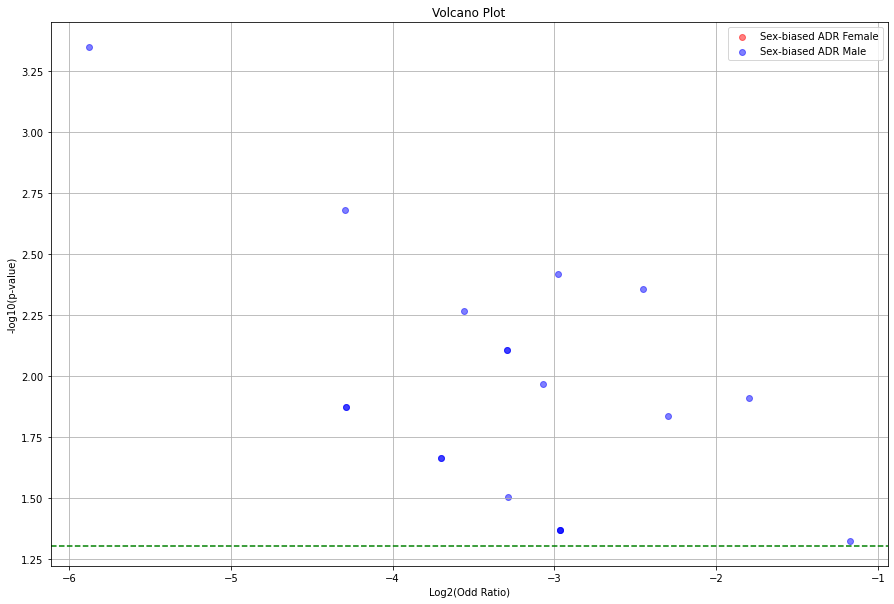

In [20]:


# Cálculo del logaritmo negativo base 10 de los p-values
df_tamoxifen['log_p_values'] = -np.log10(df_tamoxifen['P-value'])

# Cálculo del logaritmo base 2 del odd ratio
df_tamoxifen['log_odd_ratios'] = np.log2(df_tamoxifen['odds_ratio'])

# Separar los puntos en dos grupos según el signo del odd ratio
odd_ratio_pos = df_tamoxifen['log_odd_ratios'][df_tamoxifen['log_odd_ratios'] > 0]
odd_ratio_neg = df_tamoxifen['log_odd_ratios'][df_tamoxifen['log_odd_ratios'] <= 0]

# Plot
plt.figure(figsize=(15, 10))
plt.scatter(odd_ratio_pos,df_tamoxifen['log_p_values'][df_tamoxifen['log_odd_ratios'] > 0], color='red', alpha=0.5, label='Sex-biased ADR Female')
plt.scatter(odd_ratio_neg, df_tamoxifen['log_p_values'][df_tamoxifen['log_odd_ratios'] <= 0], color='blue', alpha=0.5, label='Sex-biased ADR Male')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')  # Línea para indicar el nivel de significancia




plt.xlabel('Log2(Odd Ratio)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.savefig("volcano_plot_adrs_tamoxifen.svg")
plt.show()


<ipython-input-24-75e289a5e087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tamoxifen['log_p_values'] = -np.log10(df_tamoxifen['P-value'])
<ipython-input-24-75e289a5e087>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tamoxifen['log_odd_ratios'] = np.log2(df_tamoxifen['odds_ratio'])


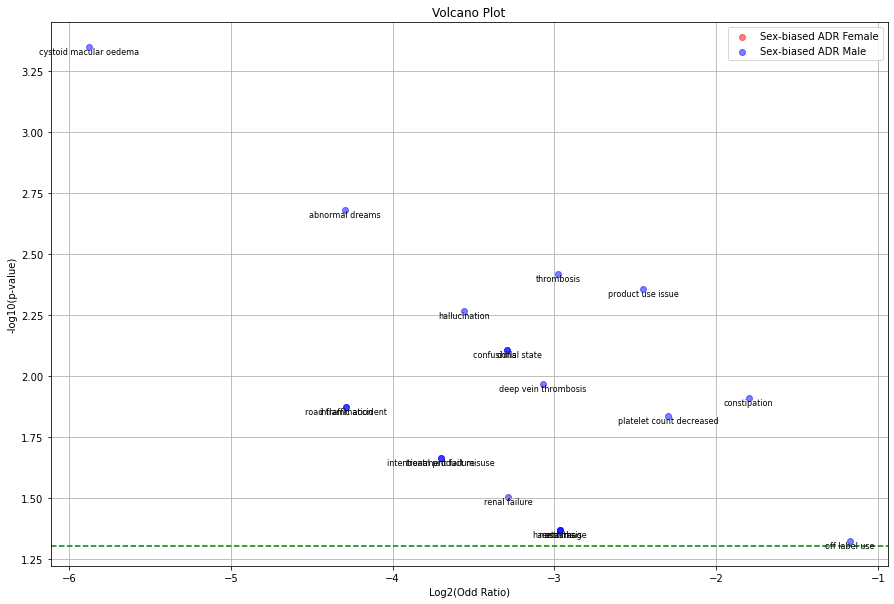

In [24]:


# Cálculo del logaritmo negativo base 10 de los p-values
df_tamoxifen['log_p_values'] = -np.log10(df_tamoxifen['P-value'])

# Cálculo del logaritmo base 2 del odd ratio
df_tamoxifen['log_odd_ratios'] = np.log2(df_tamoxifen['odds_ratio'])

# Separar los puntos en dos grupos según el signo del odd ratio
odd_ratio_pos = df_tamoxifen['log_odd_ratios'][df_tamoxifen['log_odd_ratios'] > 0]
odd_ratio_neg = df_tamoxifen['log_odd_ratios'][df_tamoxifen['log_odd_ratios'] <= 0]

# Plot
plt.figure(figsize=(15, 10))
plt.scatter(odd_ratio_pos,df_tamoxifen['log_p_values'][df_tamoxifen['log_odd_ratios'] > 0], color='red', alpha=0.5, label='Sex-biased ADR Female')
plt.scatter(odd_ratio_neg, df_tamoxifen['log_p_values'][df_tamoxifen['log_odd_ratios'] <= 0], color='blue', alpha=0.5, label='Sex-biased ADR Male')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')  # Línea para indicar el nivel de significancia


for x, y, nombre in zip(df_tamoxifen['log_odd_ratios'], df_tamoxifen['log_p_values'], df_tamoxifen['PT_name']):
    plt.text(x, y, nombre, fontsize=8, ha='center', va='top')


plt.xlabel('Log2(Odd Ratio)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.grid(True)
plt.savefig("volcano_plot_adrs_tamoxifen_names.svg")
plt.show()


In [21]:
df_tamoxifen

Drug Drug_name        ADR                     PT_name  \
3648  DB00675  tamoxifen  10053762               off label use   
3649  DB00675  tamoxifen  10062194                  metastasis   
3650  DB00675  tamoxifen  10010774                constipation   
3651  DB00675  tamoxifen  10035528    platelet count decreased   
3652  DB00675  tamoxifen  10058202      cystoid macular oedema   
3653  DB00675  tamoxifen  10039203       road traffic accident   
3654  DB00675  tamoxifen  10076309           product use issue   
3655  DB00675  tamoxifen  10010305           confusional state   
3656  DB00675  tamoxifen  10061218                inflammation   
3657  DB00675  tamoxifen  10043607                  thrombosis   
3658  DB00675  tamoxifen  10066901           treatment failure   
3659  DB00675  tamoxifen  10008531                      chills   
3660  DB00675  tamoxifen  10000125             abnormal dreams   
3661  DB00675  tamoxifen  10019063               hallucination   
3662  DB00675  tamoxifen  10055798                 haemorrhage   
3663  DB00675  tamoxifen  10003553                      asthma   
3664  DB00675  tamoxifen  10051055        deep vein thrombosis   
3665  DB00675  tamoxifen  10038435               renal failure   
3666  DB00675  tamoxifen  10074903  intentional product misuse   

                                               SOC_name  Number adrs in Male  \
3648     injury, poisoning and procedural complications                    7   
3649  neoplasms benign, malignant and unspecified (i...                    2   
3650                         gastrointestinal disorders                    6   
3651                                     investigations                    4   
3652                                      eye disorders                    3   
3653     injury, poisoning and procedural complications                    2   
3654     injury, poisoning and procedural complications                    5   
3655                           nervous system disorders                    3   
3656  general disorders and administration site cond...                    2   
3657                                 vascular disorders                    4   
3658  general disorders and administration site cond...                    2   
3659  general disorders and administration site cond...                    3   
3660                              psychiatric disorders                    3   
3661                              psychiatric disorders                    3   
3662                                 vascular disorders                    2   
3663                            immune system disorders                    2   
3664                                 vascular disorders                    3   
3665                        renal and urinary disorders                    2   
3666     injury, poisoning and procedural complications                    2   

      Number adrs in Female   P-value  \
3648                     61  0.047586   
3649                      5  0.042700   
3650                     34  0.012351   
3651                     16  0.014687   
3652                      1  0.000449   
3653                      2  0.013453   
3654                     18  0.004429   
3655                      6  0.007850   
3656                      2  0.013453   
3657                     10  0.003826   
3658                      3  0.021699   
3659                      6  0.007850   
3660                      3  0.002086   
3661                      5  0.005428   
3662                      5  0.042700   
3663                      5  0.042700   
3664                      7  0.010812   
3665                      4  0.031506   
3666                      3  0.021699   

                                            p_value_FDR Significance  \
3648  (array([ True]), array([0.04758603]), 0.050000...          Yes   
3649  (array([ True]), array([0.0427005]), 0.0500000...          Yes   
3650  (array([ True]), array([0.01235088]), 0.0500

In [22]:
 pd.value_counts(df_tamoxifen["sex_biased_log_oddratio"])

sex_biased_log_oddratio
sex-biased male    19
Name: count, dtype: int64

In [25]:
 pd.value_counts(df_tamoxifen["SOC_name"]).reset_index()

SOC_name  count
0      injury, poisoning and procedural complications      4
1   general disorders and administration site cond...      3
2                                  vascular disorders      3
3                               psychiatric disorders      2
4   neoplasms benign, malignant and unspecified (i...      1
5                          gastrointestinal disorders      1
6                                      investigations      1
7                                       eye disorders      1
8                            nervous system disorders      1
9                             immune system disorders      1
10                        renal and urinary disorders      1